In [3]:
# 练习，画出covid-19 confiremed case变化趋势和增长率曲线，只画出确诊累计人数最多的5个国家
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

cases = pd.read_csv("../covid-19-cases.csv")

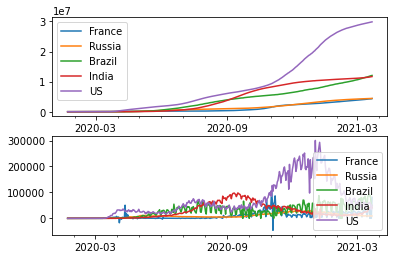

In [4]:
cases["sum"] = np.sum(cases.iloc[:, 5:-1], 1)
casesByCounty = cases.drop(columns=cases.columns[[0, 1, 3, 4]])
countryRegions = casesByCounty["Country/Region"].unique()

casesByCounty = casesByCounty.groupby('Country/Region').sum()

topCases = casesByCounty.sort_values("sum")[-5:]

dates = [datetime.strptime(date, u'%m/%d/%y').date()
         for date in topCases.columns[:-1].to_numpy()]

ax = plt.subplot(211)
for i in range(topCases.index.shape[0]):
    plt.plot(dates, topCases[i:i +
             1].to_numpy().reshape(-1)[:-1], label=topCases.index[i])


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# format the ticks
# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)


plt.legend()


ax = plt.subplot(212)
for i in range(topCases.index.shape[0]):
    plt.plot(dates[1:], np.diff(topCases[i:i+1].to_numpy()
                                ).reshape(-1)[:-1], label=topCases.index[i])
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_minor_locator(fmt_month)

plt.legend()
